In [ ]:
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found exis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Github/

/content/drive/MyDrive/Github


In [4]:
%cd houses

/content/drive/MyDrive/Github/houses


In [7]:
!git push --set-upstream origin master

Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 461.99 KiB | 4.71 MiB/s, done.
Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
remote: error: GH013: Repository rule violations found for refs/heads/master.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/pushing-a-branch-blocked-by-push-protection
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations:
remote:          - commit: 0885a9addaf6ad0b439b27cb7cf6373718a606ce
remote:            path: Analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import numpy as np


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.drop(columns='Id', inplace=True)

SalePrice is the target variable,
Id is useless
So we have 79 features

Text(0, 0.5, 'Number of Real Estate Entities')

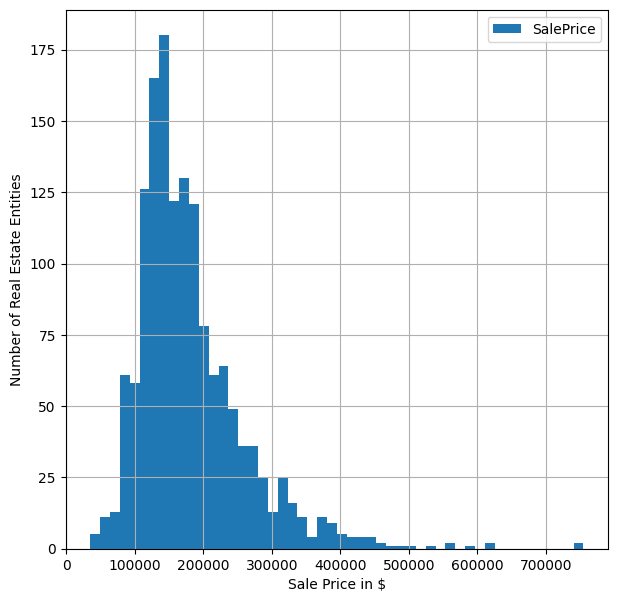

In [ ]:
plt.figure(figsize=(7,7))
train['SalePrice'].hist(bins=50,legend=True)
plt.xlabel('Sale Price in $')
plt.ylabel('Number of Real Estate Entities')

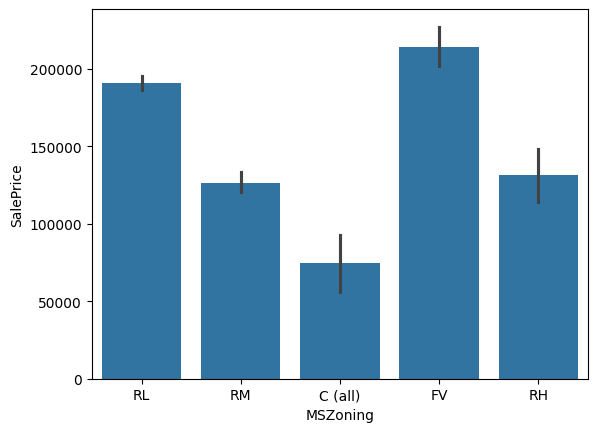

In [ ]:
sns.barplot(y = 'SalePrice', x = 'MSZoning' ,data= train);

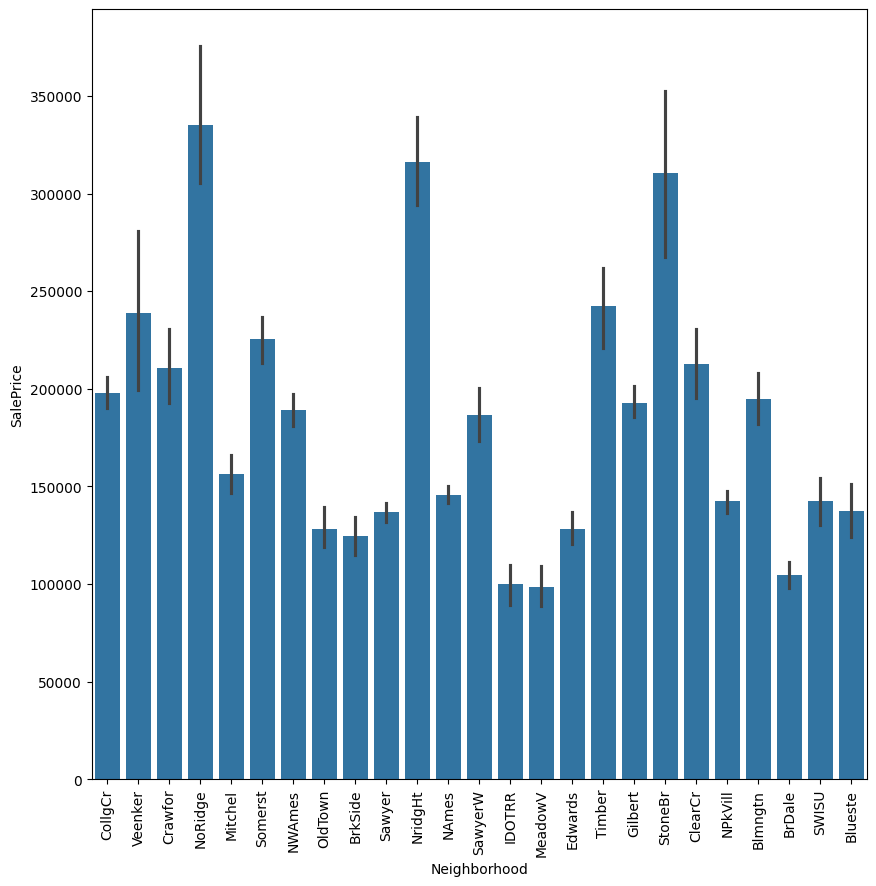

In [ ]:
plt.figure(figsize= (10,10))
sns.barplot(y = 'SalePrice', x = 'Neighborhood' ,data= train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
all_types = set(train.dtypes.to_list())

In [ ]:
train_num = train.select_dtypes(include = ['int64', 'float64'])
train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
train_cat = train.select_dtypes(include = ['O'])

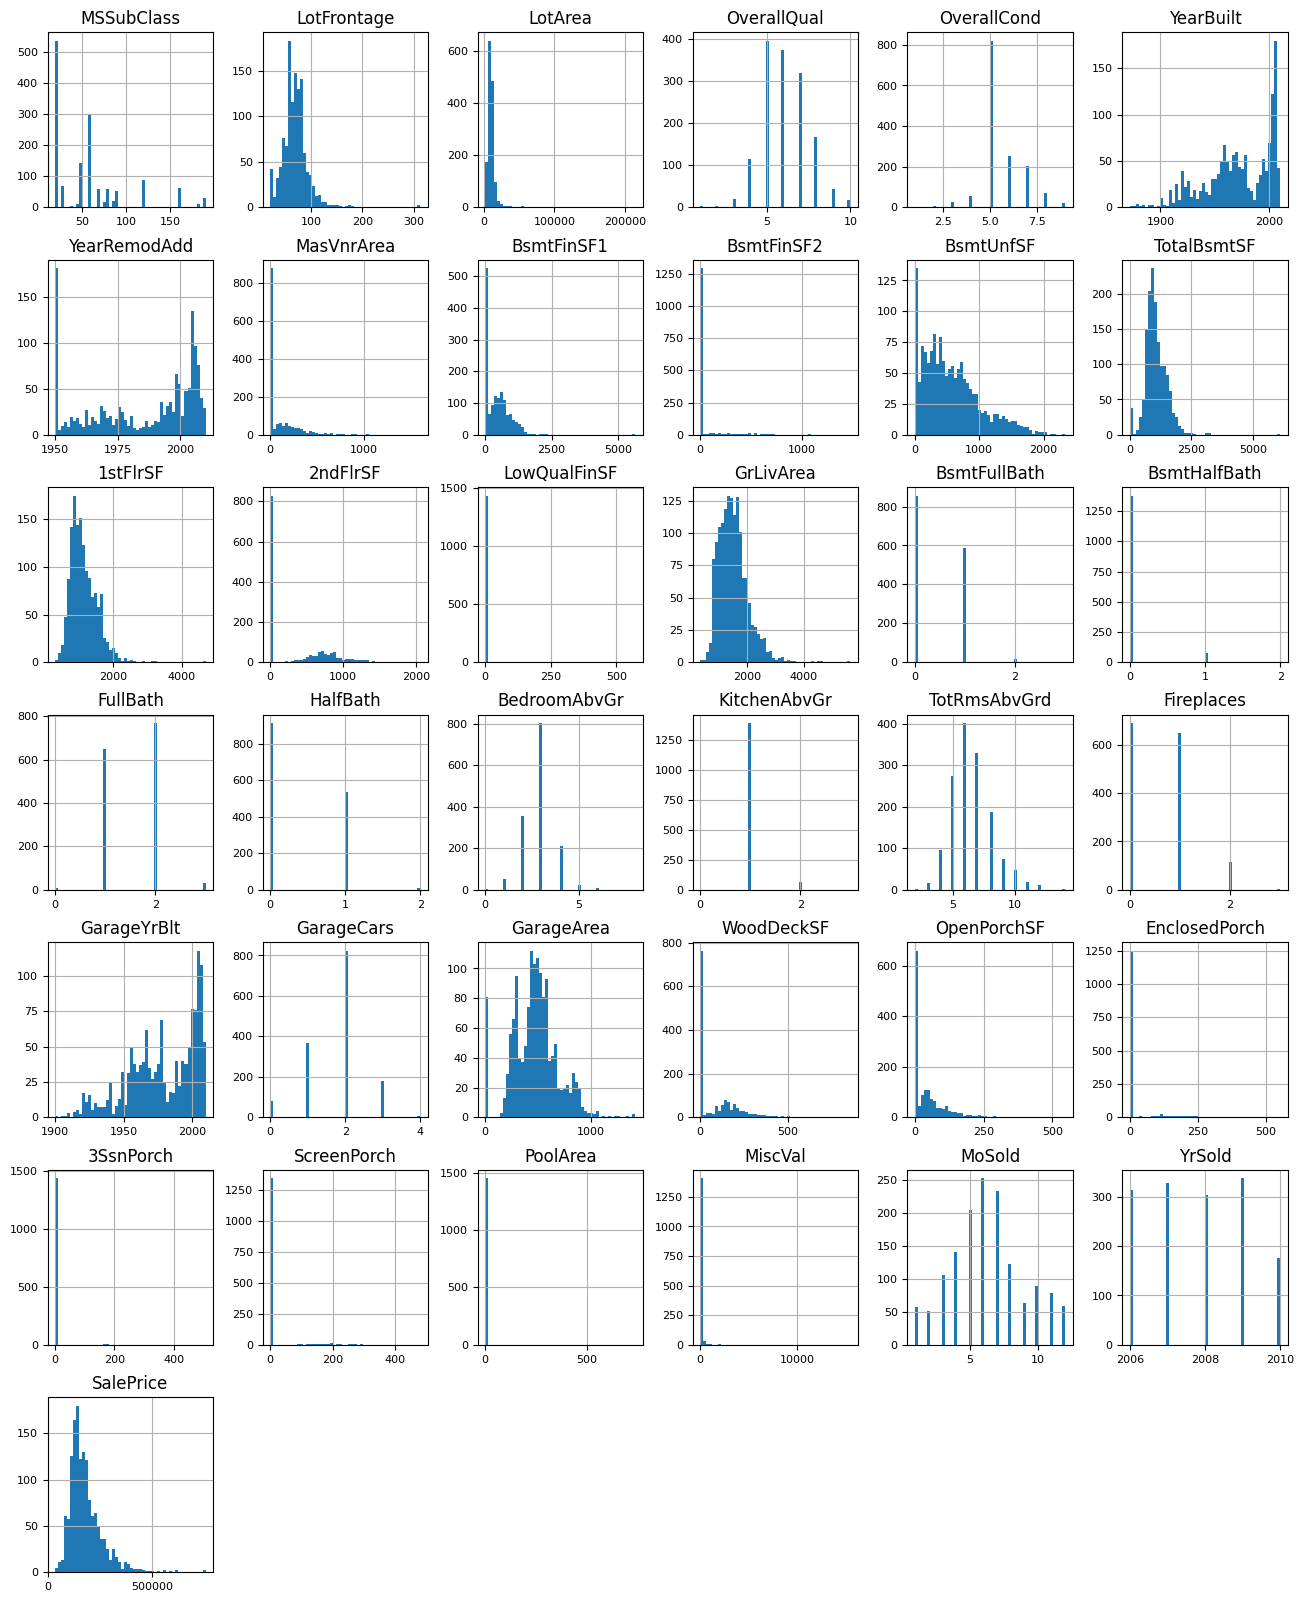

In [ ]:
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [ ]:
np.random.rand(5) < 0.3

array([ True,  True, False, False, False])

In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, val_ds_pd = split_dataset(train)
print("{} examples in training, {} examples for validation.".format(
    len(train_ds_pd), len(val_ds_pd)))

1042 examples in training, 418 examples for validation.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='SalePrice',task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_ds_pd, label='SalePrice',task = tfdf.keras.Task.REGRESSION)

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Optionally, add evaluation metrics.
model_1.compile(
    metrics=["root_mean_squared_error"])

# Train the model.
# "sys_pipes" is optional. It enables the display of the training logs.

model_1.fit(x=train_ds)

Use /tmp/tmp3d4q1cny as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.993536. Found 1042 examples.
Training model...
Model trained in 0:00:02.985677
Compiling model...
Model compiled.


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [ ]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	Heating
	HeatingQC
	HouseStyle
	KitchenAbvGr
	KitchenQual
	LandContour
	LandSlope
	LotArea
	LotConfig
	LotFrontage
	LotShape

In [ ]:
model_1.make_inspector().features()

["1stFlrSF" (1; #0),
 "2ndFlrSF" (1; #1),
 "3SsnPorch" (1; #2),
 "Alley" (4; #3),
 "BedroomAbvGr" (1; #4),
 "BldgType" (4; #5),
 "BsmtCond" (4; #6),
 "BsmtExposure" (4; #7),
 "BsmtFinSF1" (1; #8),
 "BsmtFinSF2" (1; #9),
 "BsmtFinType1" (4; #10),
 "BsmtFinType2" (4; #11),
 "BsmtFullBath" (1; #12),
 "BsmtHalfBath" (1; #13),
 "BsmtQual" (4; #14),
 "BsmtUnfSF" (1; #15),
 "CentralAir" (4; #16),
 "Condition1" (4; #17),
 "Condition2" (4; #18),
 "Electrical" (4; #19),
 "EnclosedPorch" (1; #20),
 "ExterCond" (4; #21),
 "ExterQual" (4; #22),
 "Exterior1st" (4; #23),
 "Exterior2nd" (4; #24),
 "Fence" (4; #25),
 "FireplaceQu" (4; #26),
 "Fireplaces" (1; #27),
 "Foundation" (4; #28),
 "FullBath" (1; #29),
 "Functional" (4; #30),
 "GarageArea" (1; #31),
 "GarageCars" (1; #32),
 "GarageCond" (4; #33),
 "GarageFinish" (4; #34),
 "GarageQual" (4; #35),
 "GarageType" (4; #36),
 "GarageYrBlt" (1; #37),
 "GrLivArea" (1; #38),
 "HalfBath" (1; #39),
 "Heating" (4; #40),
 "HeatingQC" (4; #41),
 "HouseStyle" 

In [ ]:
#model_1.make_inspector().variable_importances()

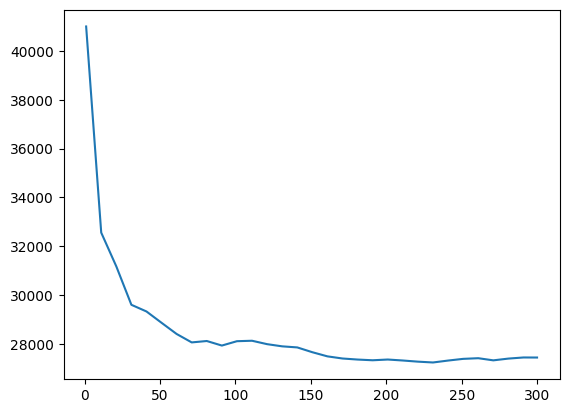

In [ ]:
logs = model_1.make_inspector().training_logs()
nm_tree = [log.num_trees for log in logs]
rmse = [log.evaluation.rmse for log in logs]

plt.plot(nm_tree,rmse)

In [ ]:
evaluation = model_1.evaluate(x=test_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py", line 546, in test_function  *
        return step_function_trained(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py", line 525, in run_step  *
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1917, in test_step  *
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1246, in compute_metrics  *
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/compile_utils.py", line 620, in update_state  *
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/metrics/base_metric.py", line 153, in decorated  *
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/metrics/base_metric.py", line 140, in update_state_fn  *
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/metrics/base_metric.py", line 722, in update_state  *
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
#Prediction
ids = test.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test,
    task = tfdf.keras.Task.REGRESSION)

preds = model_1.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 40ms/step


,Id,SalePrice
0,1461,126586.078125
1,1462,155097.109375
2,1463,182440.406250
3,1464,184748.468750
4,1465,196194.781250


In [ ]:
df_sub = pd.read_csv('sample_submission.csv')
df_sub['SalePrice'] = model_1.predict(test_ds)
df_sub.to_csv('submission.csv', index=False)


2/2 [==============================] - 0s 34ms/step


In [ ]:
from google.colab import userdata

username ='rhitamam'
git_token = userdata.get('git_token')
repository ='houses'

In [10]:
!git add .

In [ ]:
!git remote add origin https://{git_token}@github.com/{username}/{repository}.git

error: remote origin already exists.


In [ ]:
!git add .

In [ ]:
!git config user.email "rhita.mamou@gmail.com"


In [ ]:
 !git config user.username "rhitamam"

In [11]:
!git commit -m 'modified analysis'

[master d10ad1c] modified analysis
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 untitled


In [1]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [12]:
!git push -u origin master

Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (11/11), 462.19 KiB | 3.79 MiB/s, done.
Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
remote: error: GH013: Repository rule violations found for refs/heads/master.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/pushing-a-branch-blocked-by-push-protection
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations:
remote:          - commit: 0885a9addaf6ad0b439b27cb7cf6373718a606ce
remote:            path: A